In [2]:
import pandas as pd
from datetime import datetime, timedelta, date
from IPython import display

In [2]:
df = pd.DataFrame(columns = ['player_id', 'wordle_id', 'won_on_try_num', 'total_num_tries', 'created_date'])

In [3]:
df = df.append({'player_id':"travis",
                'wordle_id':201, 
                'won_on_try_num' : 5, 
                'total_num_tries' : 6,
                'created_date': datetime.now()}, 
                ignore_index = True)

df = df.append({'player_id':"travis",
                'wordle_id':201, 
                'won_on_try_num' : 4, 
                'total_num_tries' : 6,
                'created_date': datetime.now()}, 
                ignore_index = True)

df = df.append({'player_id':"travis",
                'wordle_id':201, 
                'won_on_try_num' : 4, 
                'total_num_tries' : 6,
                'created_date': datetime.now()}, 
                ignore_index = True)
df = df.append({'player_id':"travis",
                'wordle_id':201, 
                'won_on_try_num' : 4, 
                'total_num_tries' : 6,
                'created_date': datetime.now()}, 
                ignore_index = True)

df = df.append({'player_id':"travis",
                'wordle_id':201, 
                'won_on_try_num' : None, 
                'total_num_tries' : 6,
                'created_date': datetime.now()}, 
                ignore_index = True)
df = df.append({'player_id':"travis",
                'wordle_id':202, 
                'won_on_try_num' : 5, 
                'total_num_tries' : 6,
                'created_date': datetime.now()}, 
                ignore_index = True)
df = df.append({'player_id':"1ravis",
                'wordle_id':201, 
                'won_on_try_num' : 2, 
                'total_num_tries' : 6,
                'created_date': datetime.now()}, 
                ignore_index = True)
df = df.append({'player_id':"2ravis",
                'wordle_id':201, 
                'won_on_try_num' : None, 
                'total_num_tries' : 6,
                'created_date': datetime.now() }, 
                ignore_index = True)

In [4]:
reset = df
reset

,player_id,wordle_id,won_on_try_num,total_num_tries,created_date
0,travis,201,5,6,2022-02-12 20:36:25.624732
1,travis,201,4,6,2022-02-12 20:36:25.628361
2,travis,201,4,6,2022-02-12 20:36:25.630916
3,travis,201,4,6,2022-02-12 20:36:25.633618
4,travis,201,None,6,2022-02-12 20:36:25.636311
5,travis,202,5,6,2022-02-12 20:36:25.639673
6,1ravis,201,2,6,2022-02-12 20:36:25.642555
7,2ravis,201,None,6,2022-02-12 20:36:25.645546


In [5]:
df = reset

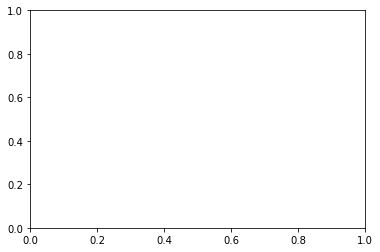

In [55]:
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import numpy as np
fig, ax = plt.subplots()
df

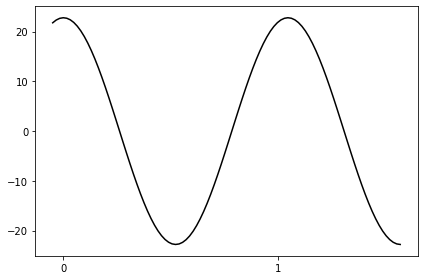

In [48]:
# Plot anything (note the non-integer min-max values)...
x = np.linspace(-0.1, np.pi, 100)
plt.plot(0.5 * x, 22.8 * np.cos(3 * x), color='black')

# use axis={'both', 'x', 'y'} to choose axis
plt.locator_params(axis="both", integer=True, tight=True)

# Just for appearance's sake
plt.margins(0.05)
plt.tight_layout()

In [53]:
df = df.fillna(0).groupby("player_id")#.plot(xticks=df.created_date, kind='line')

In [61]:
df = pd.read_csv("stubbed_messages.csv", parse_dates=["created_date"])

In [62]:
kw = lambda x: x.isocalendar()[1]; 
kw_year = lambda x: str(x.year) + ' - ' + str(x.isocalendar()[1])
grouped = df.groupby([df['created_date'].map(kw_year), 'player_id'], sort=False, as_index=False).agg({'won_on_try_num': 'sum'})
A = grouped.pivot(index='created_date', columns='player_id', values='amount').fillna(0).reset_index()

ticks = A.date.values.tolist()
del A['created_date']
ax = A.plot(kind='bar')
ax.set_xticklabels(ticks)

KeyError: 'created_date'

In [50]:
df.created_date

0    2022-02-14 15:39:11.385
1    2022-02-14 14:22:40.011
2    2022-02-14 07:54:30.584
3    2022-02-14 07:22:16.714
4    2022-02-14 01:07:01.144
               ...          
91   2022-01-31 12:12:59.842
92   2022-01-31 08:53:30.858
93   2022-01-31 08:08:17.052
94   2022-01-31 08:04:33.290
95   2022-01-30 11:54:40.865
Name: created_date, Length: 96, dtype: datetime64[ns]